In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
df = pd.read_csv("../data_restaurant.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

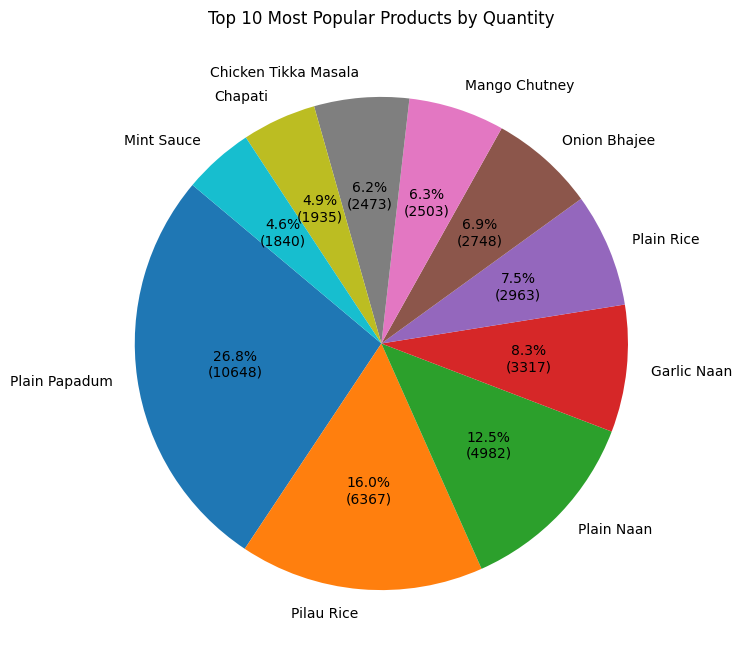

In [39]:
product_sales = df.groupby(["name", "product_id"])["quantity"].sum().reset_index()

top_products = product_sales.nlargest(10, "quantity")

def autopct_format(pct):
    total_quantity = sum(top_products["quantity"])
    quantity = int(pct / 100 * total_quantity)
    return f"{pct:.1f}%\n({quantity})"

plt.figure(figsize=(7, 7))
plt.pie(top_products["quantity"], labels=top_products["name"], autopct=autopct_format, startangle=140)
plt.axis("equal")
plt.subplots_adjust(top=1)
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

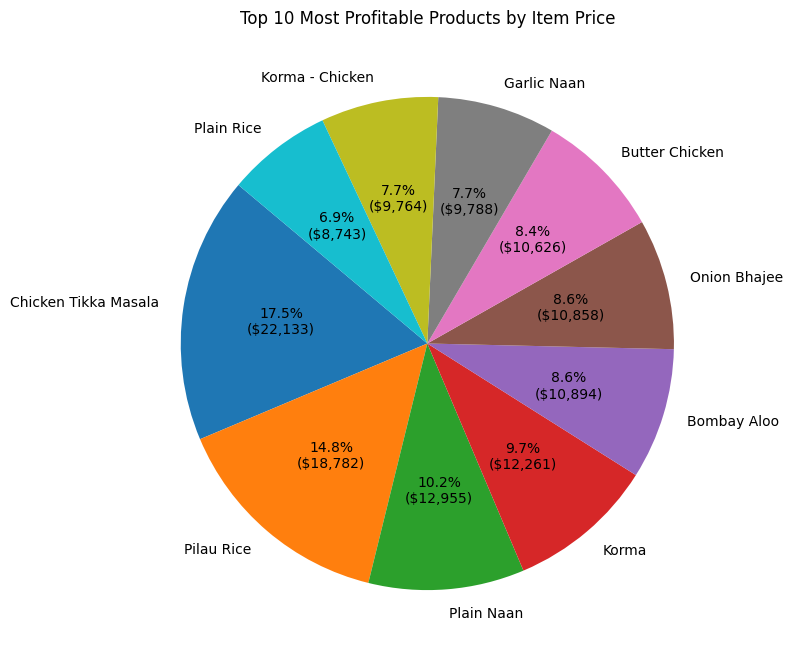

In [38]:
df["item_price"] = df["quantity"] * df["price"]

product_sales = df.groupby(["name", "product_id"])["item_price"].sum().reset_index()

top_products = product_sales.nlargest(10, "item_price")

def autopct_format(pct):
    total_item_price = sum(top_products["item_price"])
    item_price = int(pct / 100 * total_item_price)
    return f"{pct:.1f}%\n(${item_price:,})"

plt.figure(figsize=(7, 7))
plt.pie(top_products["item_price"], labels=top_products["name"], autopct=autopct_format, startangle=140)
plt.axis("equal")
plt.subplots_adjust(top=1)
plt.title("Top 10 Most Profitable Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

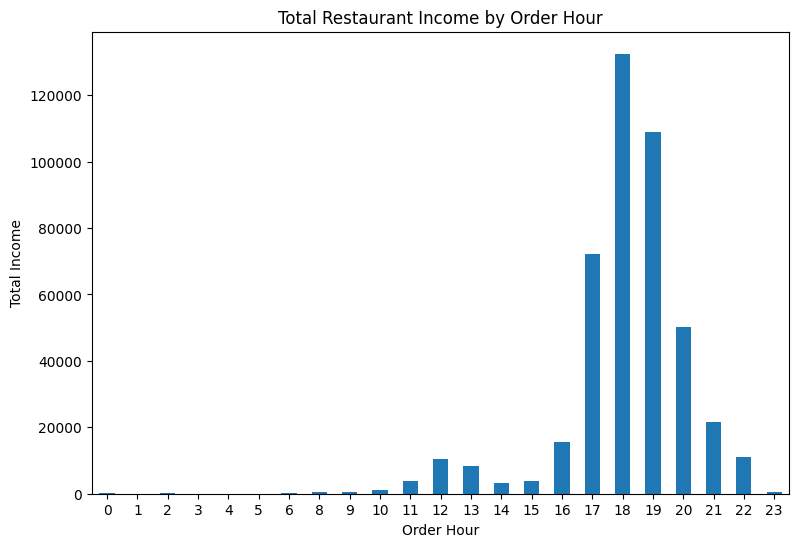

In [45]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
df["item_price"] = df["quantity"] * df["price"]

hourly_income = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(9, 6))
hourly_income.plot(kind="bar")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Order Hour")
plt.xticks(rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

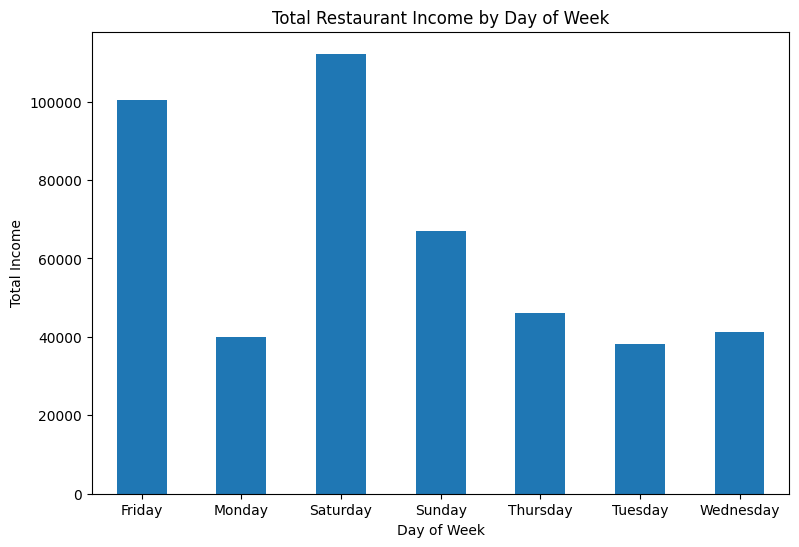

The most profitable day of the week tends to be Saturday according to the chart.


In [44]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_day_of_week"] = df["datetime"].dt.dayofweek

day_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
df["order_day_of_week"] = df["order_day_of_week"].map(day_mapping)

df["item_price"] = df["quantity"] * df["price"]

hourly_income = df.groupby("order_day_of_week")["item_price"].sum()

plt.figure(figsize=(9, 6))
hourly_income.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Day of Week")
plt.xticks(rotation=0)
plt.show()
print("The most profitable day of the week tends to be Saturday according to the chart.")